In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

races = pd.read_csv('archive/races.csv')
results = pd.read_csv('archive/results.csv')
drivers = pd.read_csv('archive/drivers.csv')
constructors = pd.read_csv('archive/constructors.csv')
circuits = pd.read_csv('archive/circuits.csv')

circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [ ]:
print(races.columns)
races = races.rename(columns={'name': 'race_name'})
circuits = circuits.rename(columns={'name': 'circuit_name'})


Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')


In [5]:
races_cir = pd.merge(races, circuits[['circuitId', 'circuitRef', 'circuit_name', 'location']], on='circuitId')
races_cir.head()

,raceId,year,round,circuitId,race_name,date,time,url,fp1_date,fp1_time,...,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,circuitRef,circuit_name,location
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,...,\N,\N,\N,\N,\N,\N,\N,sepang,Sepang International Circuit,Kuala Lumpur
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,...,\N,\N,\N,\N,\N,\N,\N,shanghai,Shanghai International Circuit,Shanghai
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,...,\N,\N,\N,\N,\N,\N,\N,bahrain,Bahrain International Circuit,Sakhir
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,...,\N,\N,\N,\N,\N,\N,\N,catalunya,Circuit de Barcelona-Catalunya,Montmeló


In [7]:
results.head() 
races_cir = pd.merge(races_cir, results[['raceId', 'positionOrder', 'driverId']], on='raceId' )
races_cir = pd.merge(races_cir, drivers[['driverId', 'driverRef', 'surname']], on='driverId' )
races_cir.head()

,raceId,year,round,circuitId,race_name,date,time,url,fp1_date,fp1_time,...,quali_time,sprint_date,sprint_time,circuitRef,circuit_name,location,positionOrder,driverId,driverRef,surname
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,1,18,button,Button
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,2,22,barrichello,Barrichello
2,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,3,15,trulli,Trulli
3,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,4,10,glock,Glock
4,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,5,4,alonso,Alonso


In [ ]:
races_dr = races_cir[(races_cir['positionOrder']==1) & (races_cir['year'] > 2010)].groupby(['surname', 'circuit_name']).size().reset_index(name='wins')
races_dr.head()

,surname,circuit_name,wins
0,Alonso,Circuit de Barcelona-Catalunya,1
1,Alonso,Hockenheimring,1
2,Alonso,Sepang International Circuit,1
3,Alonso,Shanghai International Circuit,1
4,Alonso,Silverstone Circuit,1


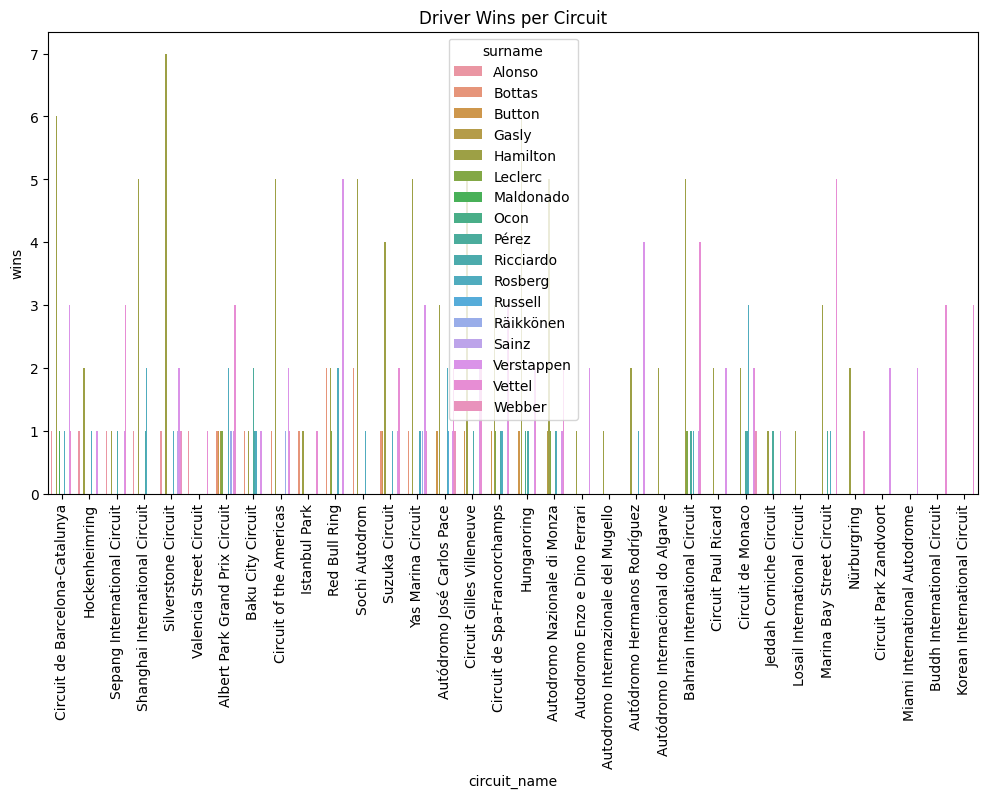

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(data=races_dr, x="circuit_name", y="wins", hue="surname")
plt.title("Driver Wins per Circuit")
plt.xticks(rotation=90)
plt.show()

In [28]:
races_dr_wins = races_dr.groupby(['surname', 'circuit_name'])['wins'].sum().reset_index(name='circuit_wins')
races_dr_wins.head()

,surname,circuit_name,circuit_wins
0,Alonso,Circuit de Barcelona-Catalunya,1
1,Alonso,Hockenheimring,1
2,Alonso,Sepang International Circuit,1
3,Alonso,Shanghai International Circuit,1
4,Alonso,Silverstone Circuit,1


In [ ]:
races_dr_wins.sort_values('circuit_wins', ascending=False, inplace=True)
races_dr_wins.head()

,surname,circuit_name,circuit_wins
46,Hamilton,Silverstone Circuit,7
32,Hamilton,Circuit de Barcelona-Catalunya,6
37,Hamilton,Hungaroring,6
110,Verstappen,Red Bull Ring,5
49,Hamilton,Yas Marina Circuit,5


In [33]:
idx = races_dr_wins.groupby("circuit_name")["circuit_wins"].idxmax()
most_successful_per_circuit = races_dr_wins.loc[idx]
most_successful_per_circuit.head(10)
most_successful_per_circuit.sort_values('circuit_wins', ascending=False)

,surname,circuit_name,circuit_wins
46,Hamilton,Silverstone Circuit,7
32,Hamilton,Circuit de Barcelona-Catalunya,6
37,Hamilton,Hungaroring,6
49,Hamilton,Yas Marina Circuit,5
35,Hamilton,Circuit of the Americas,5
24,Hamilton,Autodromo Nazionale di Monza,5
47,Hamilton,Sochi Autodrom,5
28,Hamilton,Bahrain International Circuit,5
45,Hamilton,Shanghai International Circuit,5
30,Hamilton,Circuit Gilles Villeneuve,5


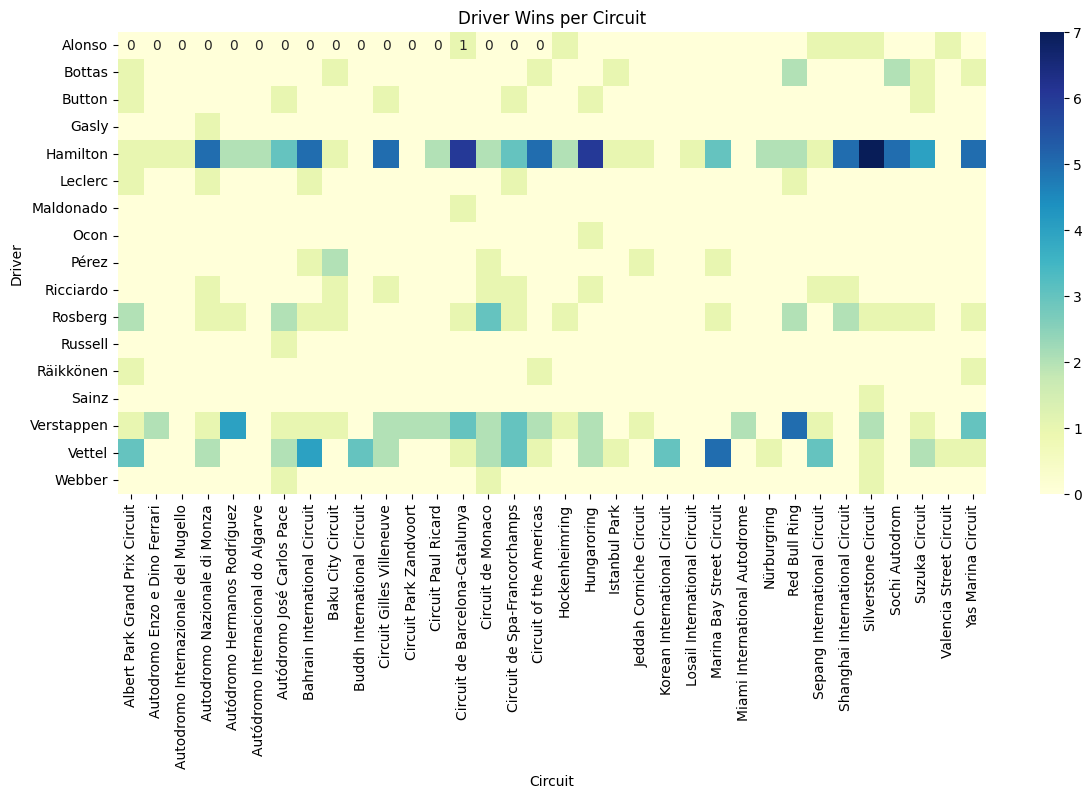

In [35]:
pivot = races_dr_wins.pivot_table(index="surname", columns="circuit_name", values="circuit_wins", fill_value=0)

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Driver Wins per Circuit")
plt.xlabel("Circuit")
plt.ylabel("Driver")
plt.show()


DNF Rates per Circuit

In [55]:
results.head()
#races.head()


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [ ]:

dnf = results.merge(races[['raceId', 'circuitId', 'year']], on='raceId')
circuits = circuits.rename(columns={'name': 'circuit_name'})
dnf = dnf.merge(circuits[['circuitId', 'circuit_name']], on='circuitId')
dnf.head()


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,circuitId,year,circuit_name
0,1,18,1,1,22,1,1,1,1,10.0,...,1:34:50.616,5690616,39,2,1:27.452,218.300,1,1,2008,Albert Park Grand Prix Circuit
1,2,18,2,2,3,5,2,2,2,8.0,...,+5.478,5696094,41,3,1:27.739,217.586,1,1,2008,Albert Park Grand Prix Circuit
2,3,18,3,3,7,7,3,3,3,6.0,...,+8.163,5698779,41,5,1:28.090,216.719,1,1,2008,Albert Park Grand Prix Circuit
3,4,18,4,4,5,11,4,4,4,5.0,...,+17.181,5707797,58,7,1:28.603,215.464,1,1,2008,Albert Park Grand Prix Circuit
4,5,18,5,1,23,3,5,5,5,4.0,...,+18.014,5708630,43,1,1:27.418,218.385,1,1,2008,Albert Park Grand Prix Circuit


/var/folders/4w/0983xwzj4rjf72hxdhp98sxm0000gn/T/ipykernel_33727/3785354523.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dnf_c = dnf[dnf['year']>2010].groupby('circuit_name').apply(lambda x: (x['statusId'] != 1).mean()).reset_index(name='dnf_rate')


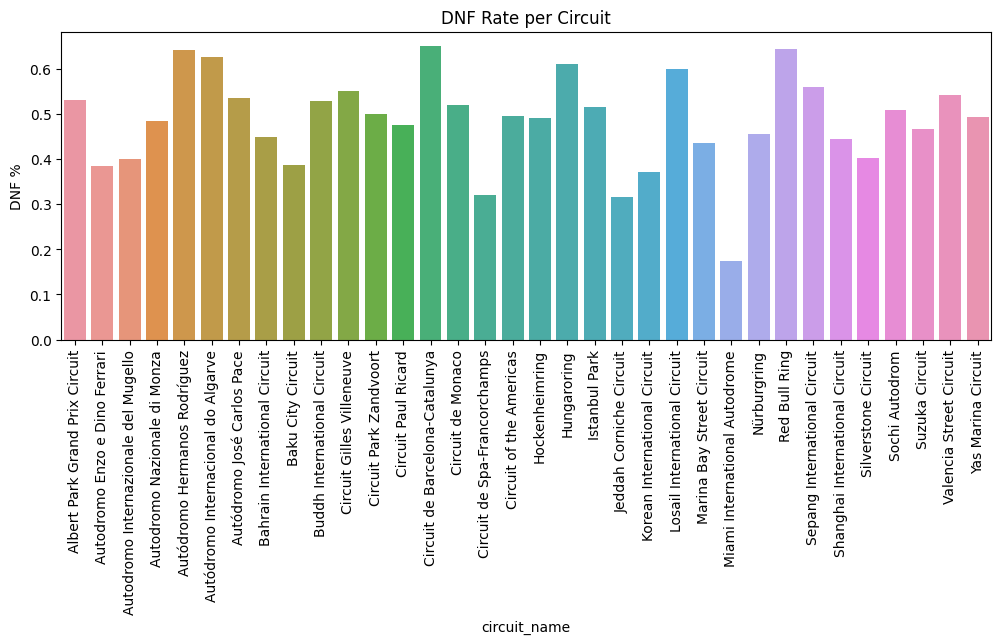

In [54]:
dnf_c = dnf[dnf['year']>2010].groupby('circuit_name').apply(lambda x: (x['statusId'] != 1).mean()).reset_index(name='dnf_rate')

plt.figure(figsize=(12,4))
sns.barplot(data=dnf_c, x="circuit_name", y="dnf_rate")
plt.title("DNF Rate per Circuit")
plt.xticks(rotation=90)
plt.ylabel("DNF %")
plt.show()

In [70]:
status = pd.read_csv('archive/status.csv')
dnf_pen = dnf.merge(status, on='statusId')
dnf_pen.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,circuitId,year,circuit_name,status
0,1,18,1,1,22,1,1,1,1,10.0,...,5690616,39,2,1:27.452,218.300,1,1,2008,Albert Park Grand Prix Circuit,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,5696094,41,3,1:27.739,217.586,1,1,2008,Albert Park Grand Prix Circuit,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,5698779,41,5,1:28.090,216.719,1,1,2008,Albert Park Grand Prix Circuit,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,5707797,58,7,1:28.603,215.464,1,1,2008,Albert Park Grand Prix Circuit,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,5708630,43,1,1:27.418,218.385,1,1,2008,Albert Park Grand Prix Circuit,Finished


In [ ]:
dnf_pen = dnf_pen[dnf_pen['status'].isin(['Accident','Collision'])].groupby('circuit_name').size().reset_index(name='issues')
dnf_pen.sort_values('issues', ascending=False, inplace=True)
dnf_pen.head()



,circuit_name,issues
24,Circuit de Monaco,191
27,Circuit de Spa-Francorchamps,100
7,Autodromo Nazionale di Monza,92
19,Circuit Gilles Villeneuve,87
52,Nürburgring,86


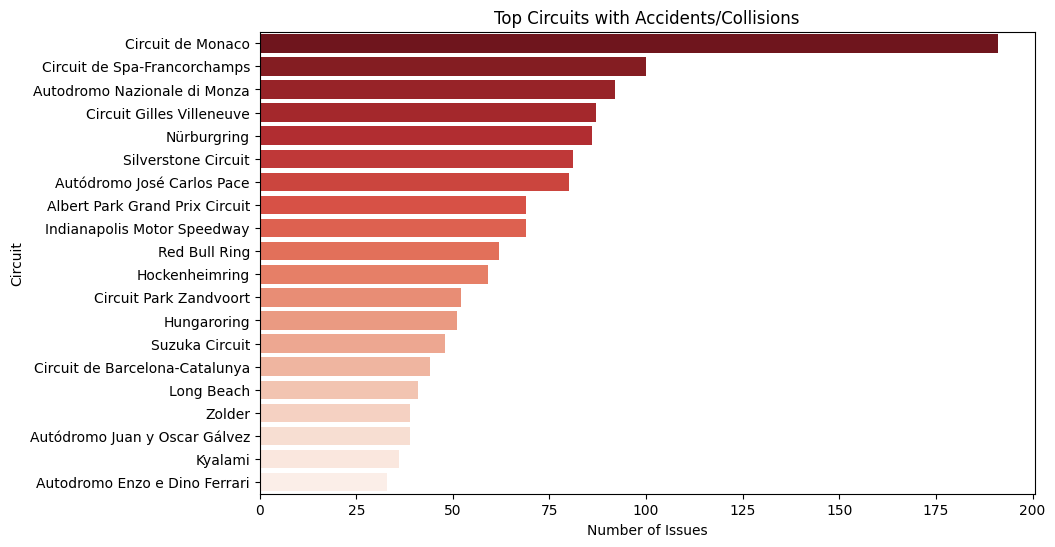

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(data=dnf_pen.head(20), x='issues', y='circuit_name', palette='Reds_r')
plt.title('Top Circuits with Accidents/Collisions')
plt.xlabel('Number of Issues')
plt.ylabel('Circuit')
plt.show()